# Feature Importance

This notebook is responsible for evaluating the importance of each feature of the dataset. 

These results are also present in the paper related to the dataset, and for that reason this code is just to reconfirm which features most influence the "FWF" criteria.

The selection is done by usage of Boosting of Decision Trees (XGCBoost to more precise). The results prove that "Feed rate vf" and "Cutting speed vc" are indeed the features that most influence the results of "Flank Wear Failure (FWF)".

For this reason, these must involved in the calculation of wear in the degradation tool used.

In [ ]:
"""
Software Lab 2025 Group 25

File made by: Eduardo Silva (03805057)
eduardo.silva@tum.de
"""

In [4]:
from pathlib import Path
import pandas as pd

# Current working directory (notebook location)
BASE_DIR = Path.cwd()

file_path = BASE_DIR.parent / "XAI_Drilling_Dataset.csv"

df = pd.read_csv(file_path)

print(df.head())

   ID  Cutting speed vc [m/min]  Spindle speed n [1/min]  Feed f [mm/rev]  \
0   1                     29.92                      794            0.218   
1   2                     29.85                      792            0.241   
2   3                     22.85                      606            0.183   
3   4                     29.60                      785            0.236   
4   5                     17.43                      462            0.246   

   Feed rate vf [mm/min]  Power Pc [kW]  Cooling [%] Material Drill Bit Type  \
0                    173         194.87           75        N              W   
1                    191         214.71           75        N              W   
2                    111          95.68           50        P              N   
3                    237         206.93           75        N              W   
4                    114          74.85           50        K              H   

   Process Time [sec]  Main Failure  BEF  CCF  FWF  WDF 

   ID     VC   SS     FF   VF      PC  Cooling  Material  Drill Bit Type  \
0   1  29.92  794  0.218  173  194.87       75         1               2   
1   2  29.85  792  0.241  191  214.71       75         1               2   
2   3  22.85  606  0.183  111   95.68       50         2               1   
3   4  29.60  785  0.236  237  206.93       75         1               2   
4   5  17.43  462  0.246  114   74.85       50         0               0   

    Time  Main Failure  BEF  CCF  FWF  WDF  
0  19.26             0    0    0    0    0  
1  19.55             0    0    0    0    0  
2  36.16             0    0    0    0    0  
3  21.22             1    0    0    1    0  
4  33.56             0    0    0    0    0  


/home/myuser/anaconda3/envs/sl-siemens/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:26:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 1.0000


<Figure size 1000x600 with 0 Axes>

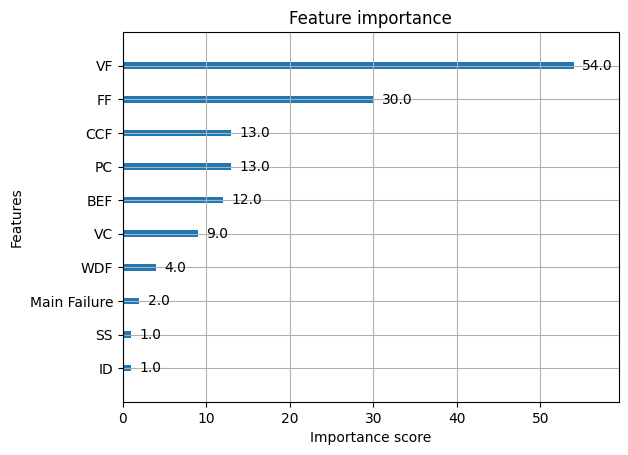

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Load dataset
file_path = r"XAI_Drilling_Dataset.csv"
df = pd.read_csv(file_path)


df = df.rename(columns={
    "Cutting speed vc [m/min]": "VC", 
    "Spindle speed n [1/min]": "SS",
    "Feed f [mm/rev]": "FF",
    "Feed rate vf [mm/min]": "VF",
    "Power Pc [kW]": "PC",
    "Cooling [%]": "Cooling",
    "Process Time [sec]": "Time",
    })

# Encode categorical variables
label_encoders = {}
for col in ["Material", "Drill Bit Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


print(df.head())

# Define features and target
X = df.drop(columns=["FWF"])
y = df["FWF"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train, y_train)

# Accuracy on test set
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type="weight")
plt.show()
